# Project 4 - Fitting from Scratch

In this notebook, you will write code that will:
-  generate a dataset, 
-  model it using a polynomial regression, 
-  and find the optimal model parameters for it (writing your own optimization routine).

All of the parts of this are meant to be done "from scratch", so do not use sklearn. (numpy's ok)  
Note: this is a continuation of the exercise we started in class previously.  

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

## Dataset
Create a dataset with 1,000 X and y values, each w/ a small amount of added uniform random noise (max val = 0.1)

-  make X go from -5 to 5 (plus noise)
-  make y = sin(x)  (plus noise)

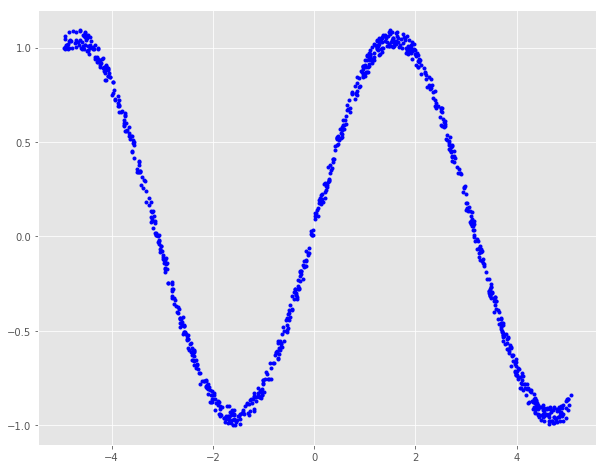

In [2]:
np.random.seed(1)
noise = 0.1 * np.random.rand(1000)
X = (10 * np.random.rand(1000)) - 5 + noise
y = np.sin(X)  + noise
fig,ax = plt.subplots(figsize=(10,8))
plt.plot(X,y,'b.')

## Augment X
Write a function that adds new columns to the dataset of powers of X, up to and including X**5

In [3]:
def poly_matrix(data, n):
    matrix = np.zeros(len(data) * (n+1))
    matrix = matrix.reshape(len(data), (n+1))
    data = np.reshape(data, (len(data),))
    for i in range(n+1):
        matrix[:,i] = data**i
    return matrix

## Fit a Linear Regression model to the training data
Assume that we have a polynomial regression model
\begin{equation*}
y(X;\theta) = \theta_0 + \theta_1 x + \theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4 +\theta_5 x^5 
\end{equation*}

Assume that we're using a mean squared error function.

-  Find the optimal value of theta (ie theta_0 through theta_5). Note: Refer to Ch. 4, Eqn's 4.6 and 4.7.

-  Try this for 3 different values of alpha.  Note how long it takes for the optimization to converge (or if it doesn't).


In [4]:
def  cal_cost(theta,X_b,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X_b.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [5]:
def gradient_descent(X_b, y, alpha = 1e-6, n_iterations = 1000):
    m = len(y) # number of points
    y = np.reshape(y, (m, 1)) # fixes a shape error
    theta = np.random.randn((len(X_b[1])),1) # random initialization 
 
    cost_history = np.zeros(n_iterations)
    theta_history = np.zeros((n_iterations,len(X_b[1])))
    
    for iteration in range(n_iterations):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - alpha * gradients
        cost = cal_cost(theta, X_b, y)
        
        theta_history[iteration,:] =theta.T
        cost_history[iteration]  = cost
        
    return theta, cost_history, theta_history

In [6]:
quintic_matrix = poly_matrix(X,5)
theta, cost_history, theta_history = gradient_descent(quintic_matrix, y)

Theta: 
[[ 1.01358732]
 [ 0.19228336]
 [-1.42525981]
 [ 0.57771764]
 [ 0.07235436]
 [-0.02959601]] 

 Cost: 25214961.533992488 



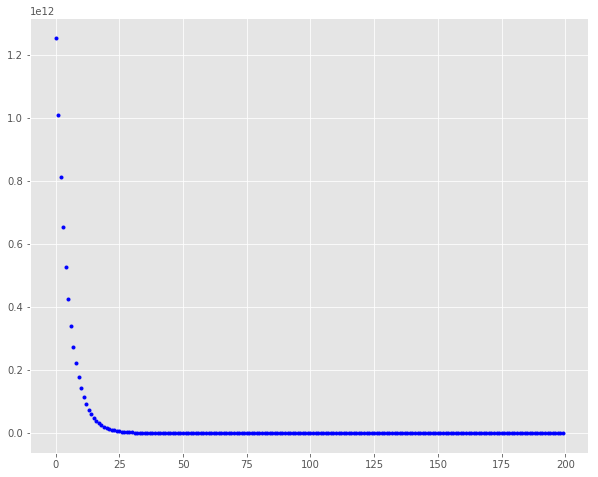

In [7]:
print(f"Theta: \n{theta} \n\n Cost: {cost_history[-1]} \n")
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200),cost_history[:200],'b.')
plt.show()

## Plot the Final Model
Make a plot showing the (X,y) data points of the training set, and superimpose the line for the model on the same plot.

In [8]:
def plot_model(X, theta_best, poly_matrix):
    X = np.reshape(X, (1000,1))
    y_pred = poly_matrix @ theta_best 
    fig,ax = plt.subplots(figsize=(10,8))
    plt.xlim(-4,4)
    plt.ylim(-6,6)
    plt.scatter(X, y_pred)
    plt.plot(X,y,'b.')
    plt.show()

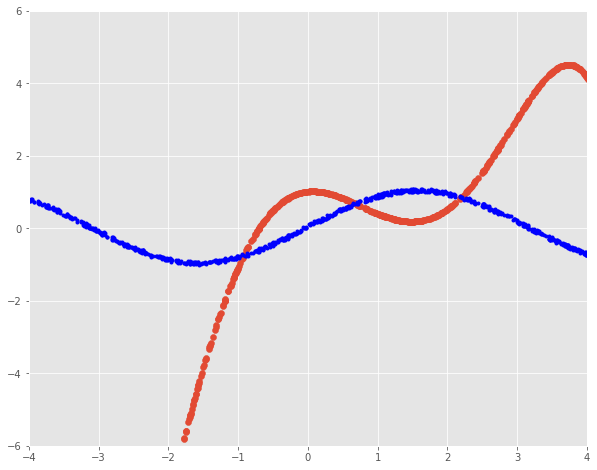

In [9]:
plot_model(X, theta, quintic_matrix)

## Different Model Degrees
Try this for n = (2, 5, 10, and 100).  Plot the resulting models.

## Second Degree Polynomial

In [10]:
quadratic_matrix = poly_matrix(X,2)
theta_best_quadratic, cost_history, theta_history = gradient_descent(quadratic_matrix, y)

Theta: 
[[-2.1574205 ]
 [ 0.12874024]
 [ 0.55579594]] 

 Cost: 13274168.62618046 



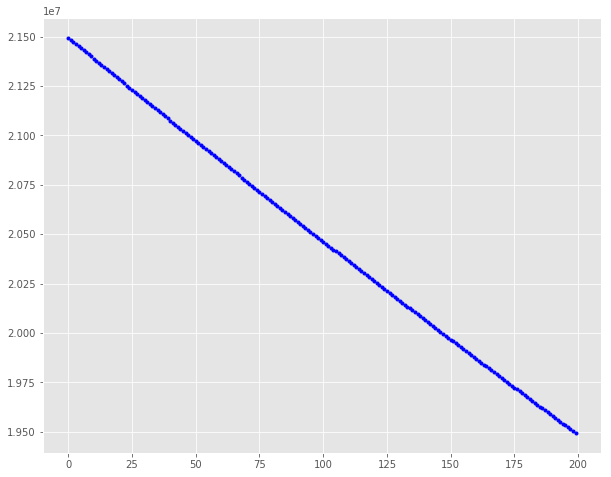

In [11]:
print(f"Theta: \n{theta_best_quadratic} \n\n Cost: {cost_history[-1]} \n")
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200),cost_history[:200],'b.')
plt.show()

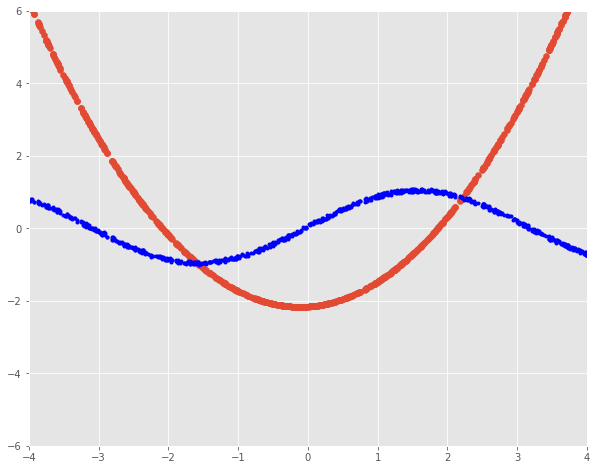

In [12]:
plot_model(X, theta_best_quadratic, quadratic_matrix)

## Tenth Degree Polynomial

In [13]:
ten_matrix = poly_matrix(X,10)
theta_best_ten, cost_history, theta_history = gradient_descent(ten_matrix, y, alpha = 1e-13)

Theta: 
[[ 0.60858186]
 [-1.36097972]
 [-0.34698733]
 [ 0.66658679]
 [-1.53549921]
 [ 0.08510745]
 [ 0.21501391]
 [ 0.91746997]
 [-2.48391468]
 [-0.04893292]
 [ 0.11014392]] 

 Cost: 326122909362534.75 



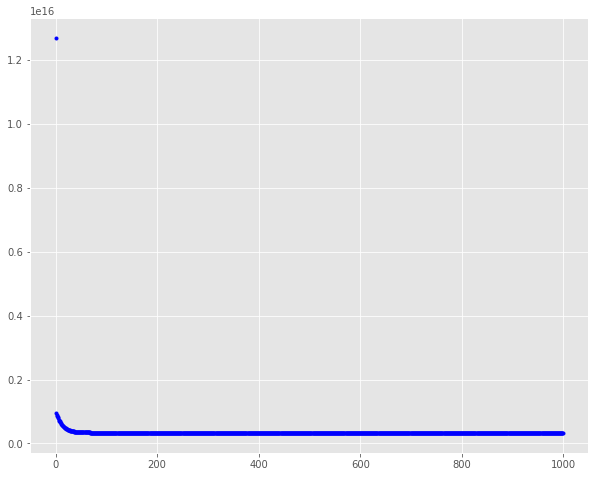

In [14]:
print(f"Theta: \n{theta_best_ten} \n\n Cost: {cost_history[-1]} \n")
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(1000),cost_history[:1000],'b.')
plt.show()

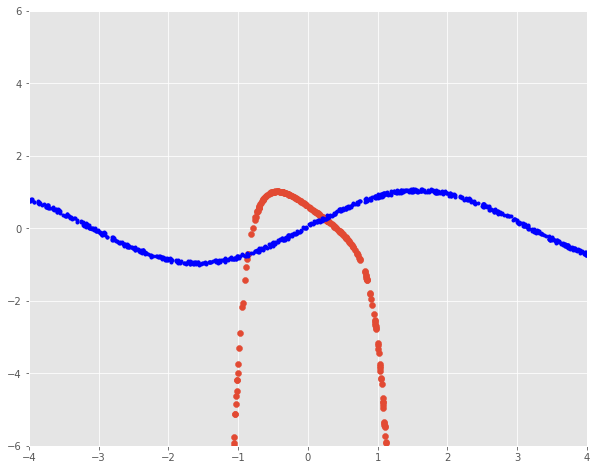

In [15]:
plot_model(X, theta_best_ten, ten_matrix)

## Hundreth Degree Polynomial

In [16]:
hundred_matrix = poly_matrix(X,100)
theta_best_hundred, cost_history, theta_history = gradient_descent(hundred_matrix, y, alpha = 1e-150, n_iterations = int(1e3))

Cost: 2.8500963095282105e+144 



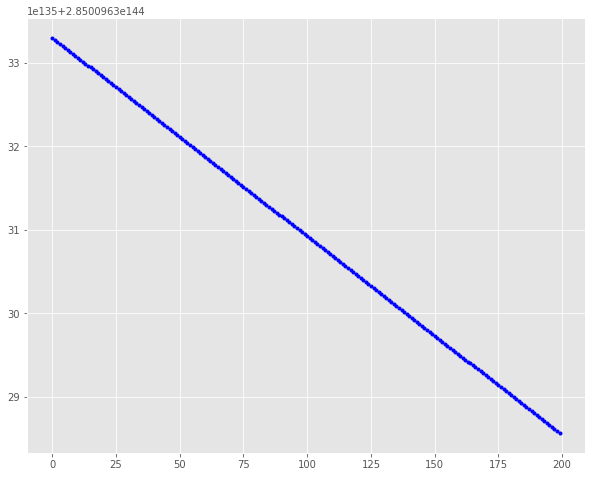

In [17]:
print(f"Cost: {cost_history[-1]} \n")
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200),cost_history[:200],'b.')
plt.show()

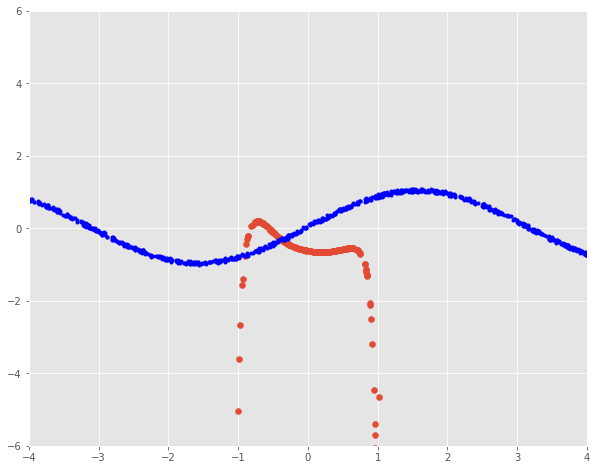

In [18]:
plot_model(X, theta_best_hundred, hundred_matrix)

## Stochastic Gradient Descent

In [31]:
def stocashtic_gradient_descent(X_b,y,alpha=0.0001,n_iterations=10):
    m = len(y)
    cost_history = np.zeros(n_iterations)
    theta = np.random.randn((len(X_b[1])),1) # random initialization
    
    for iteration in range(n_iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X_b[rand_ind,:].reshape(1,X_b.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*alpha*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[iteration]  = cost
        
    return theta, cost_history

In [32]:
theta, cost_history = stocashtic_gradient_descent(quintic_matrix,y)

Theta: 
[[ 0.63864259]
 [-0.88544451]
 [ 0.96605229]
 [ 1.03345085]
 [-0.05082121]
 [-0.04688415]] 

 Cost: 43942.89267154998 



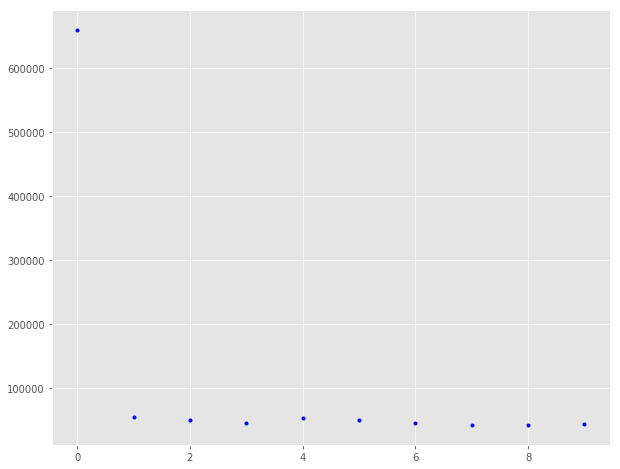

In [33]:
print(f"Theta: \n{theta} \n\n Cost: {cost_history[-1]} \n")
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(10),cost_history[:10],'b.')
plt.show()

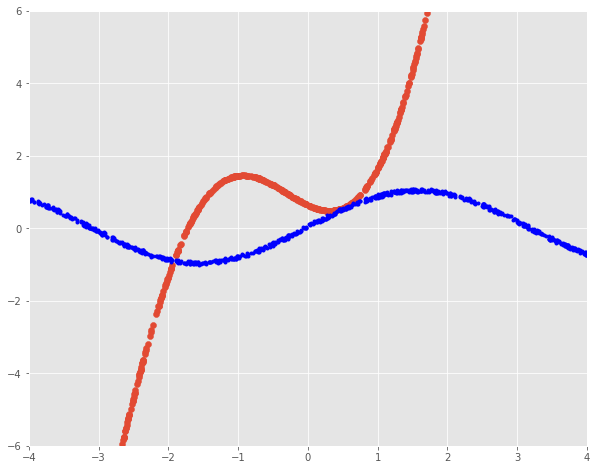

In [34]:
plot_model(X, theta, quintic_matrix)